# preventing overfitting

In [1]:
import networks
import numpy as np
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(123)

In [2]:
# load datasets

data_dir = Path("data")
multimodal_train = pd.read_csv(data_dir / "regression" / "multimodal-sparse-training.csv")
multimodal_test = pd.read_csv(data_dir / "regression" / "multimodal-sparse-test.csv")
rings3_train = pd.read_csv(data_dir / "classification" / "rings3-balance-training.csv")
rings5_train = pd.read_csv(data_dir / "classification" / "rings5-sparse-training.csv")
rings3_test = pd.read_csv(data_dir / "classification" / "rings3-balance-test.csv")
rings5_test = pd.read_csv(data_dir / "classification" / "rings5-sparse-test.csv")
xor3_train = pd.read_csv(data_dir / "classification" / "xor3-balance-training.csv")
xor3_test = pd.read_csv(data_dir / "classification" / "xor3-balance-test.csv")

ze zbioru testowego wydzielę malutki zbiór walidacyjny na którym będziemy sprawdzać jak zachowuje się nasza sieć w trakcie uczenia

In [3]:
multimodal_val = multimodal_test.sample(frac=0.2)
multimodal_test = multimodal_test.drop(multimodal_val.index)

rings3_val = rings3_test.sample(frac=0.2)
rings3_test = rings3_test.drop(rings3_val.index)

rings5_val = rings5_test.sample(frac=0.2)
rings5_test = rings5_test.drop(rings5_val.index)


xor3_val = xor3_test.sample(frac=0.2)
xor3_test = xor3_test.drop(xor3_val.index)

# multimodal

In [4]:
norm = networks.assets.Normalizator(multimodal_train)
val = norm(multimodal_val)
train = norm(multimodal_train)

test = norm(multimodal_test)

In [5]:
train[["x"]].to_numpy().T.shape

(1, 40)

Text(0.5, 1.0, 'zbiór treningowy')

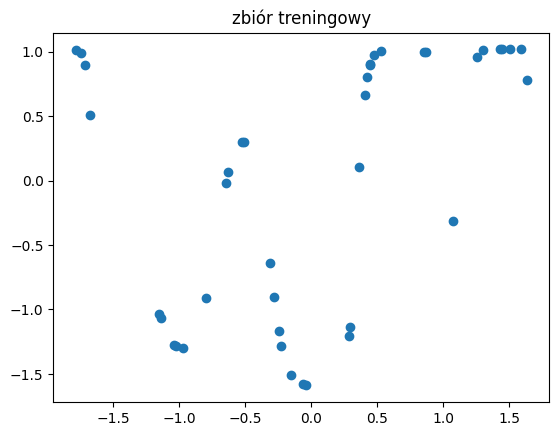

In [6]:
plt.scatter(train[["x"]], train[["y"]])
plt.title("zbiór treningowy")

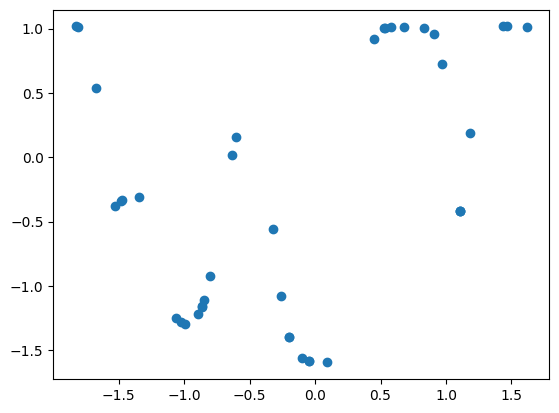

In [7]:
plt.scatter(val[["x"]], val[["y"]])

Text(0.5, 1.0, 'zbior walidacyjny')

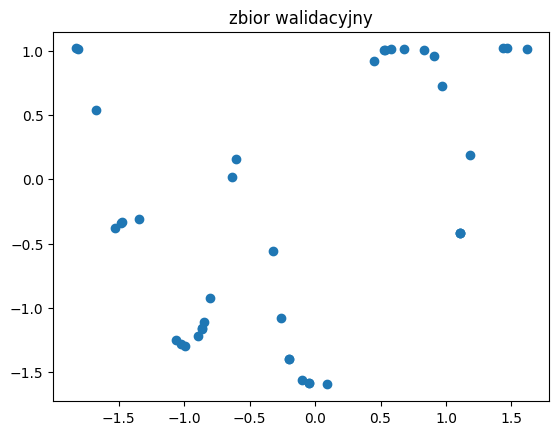

In [8]:
plt.scatter(val[["x"]], val[["y"]])
plt.title("zbior walidacyjny")

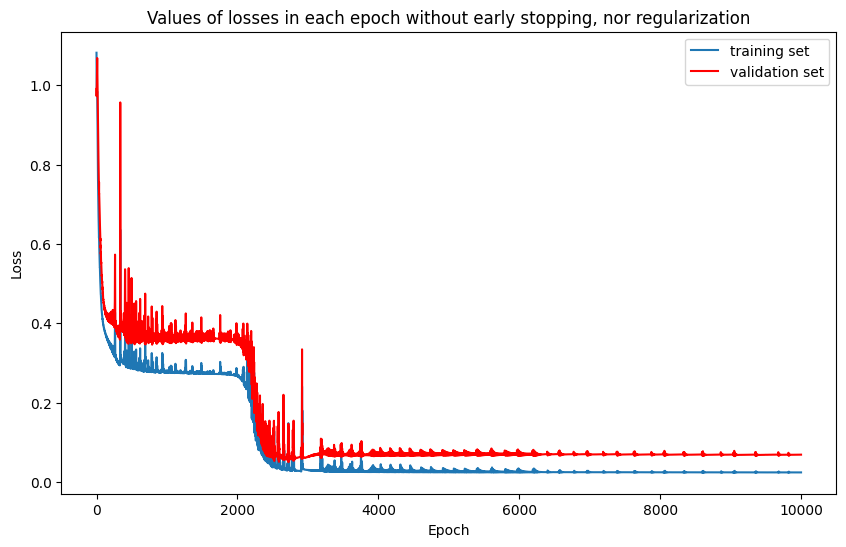

MSE train:  5657.9058347762175
MSE val:  5837.196193554666
MSE test:  5139.66654950624


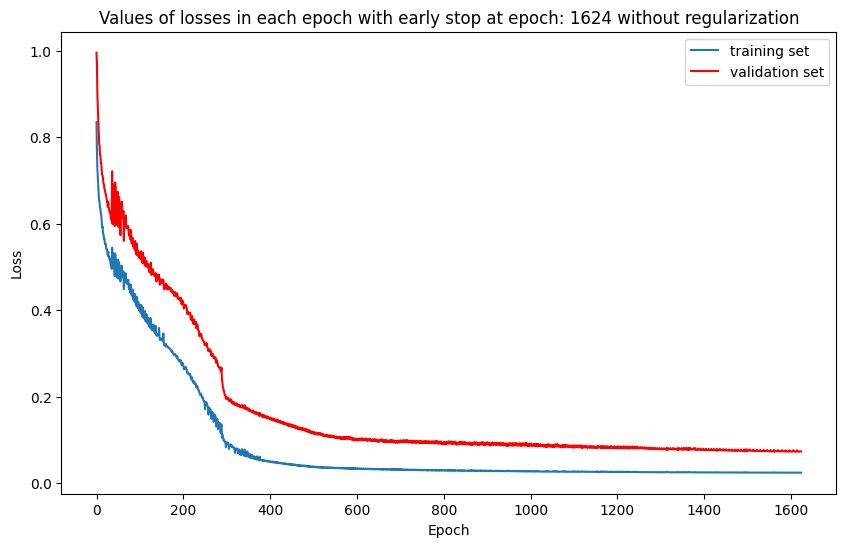

MSE train:  5782.719247484846
MSE val:  5989.476998291101
MSE test:  5177.070114551066


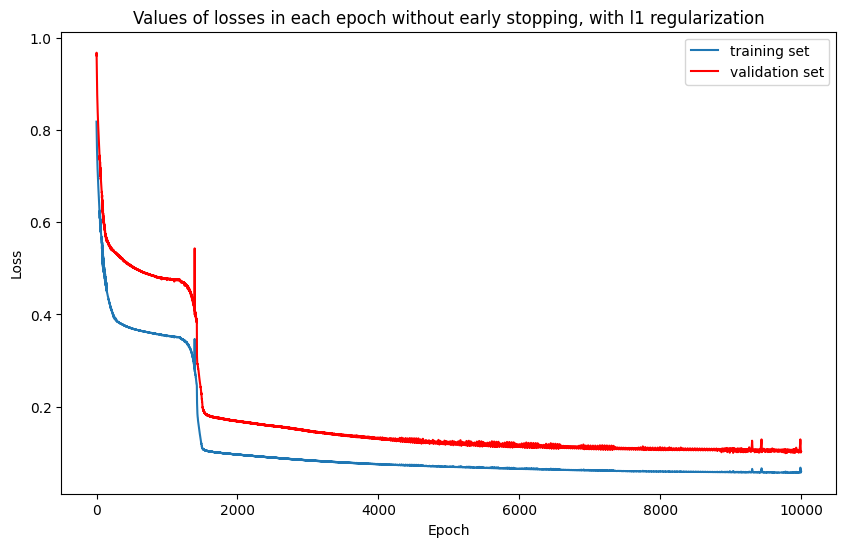

MSE train:  5758.0924333211315
MSE val:  6047.316415167556
MSE test:  5310.42561740351


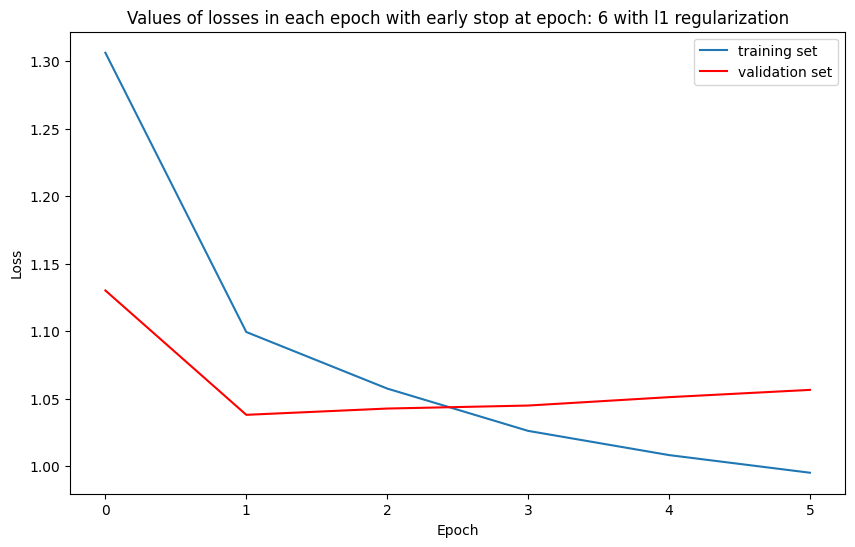

MSE train:  923.426247961743
MSE val:  885.7446976820886
MSE test:  902.9165762984882


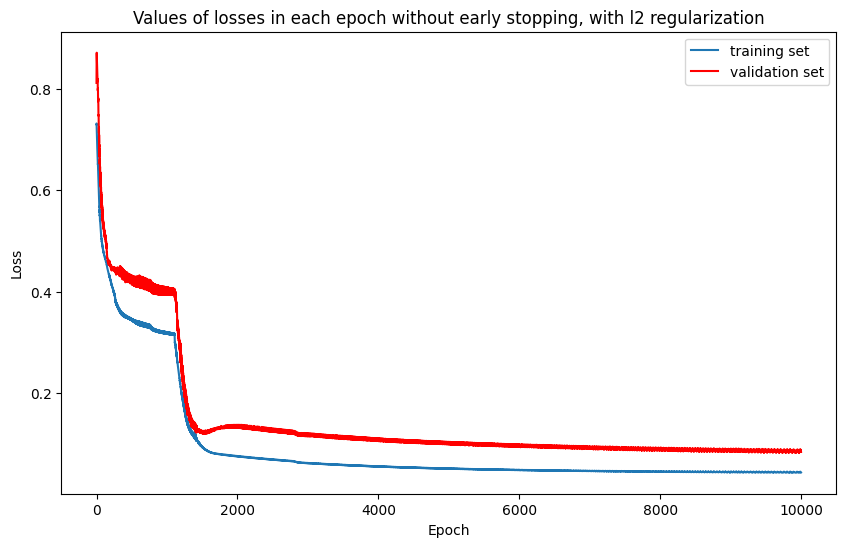

MSE train:  6028.492807780606
MSE val:  5879.959374898872
MSE test:  5223.006745213092


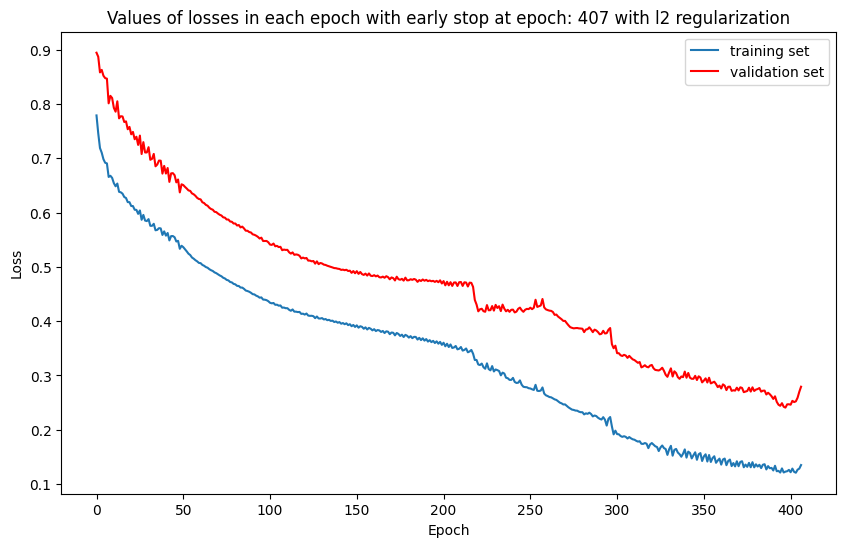

MSE train:  6451.8203935106
MSE val:  6311.969948804726
MSE test:  5651.546406056424


In [9]:
layers = [
    {"output_dim": 10, "activation": "relu", "init": "he"},
    {"output_dim": 10, "activation": "relu", "init": "he"},
    {"output_dim": 10, "activation": "relu", "init": "he"},
    {"output_dim": 1, "activation": "linear", "init": "uniform"}
]

max_epochs = 10000

regularizations = [None, "l1", "l2"]
early_stops = [False, True]

for reg in regularizations:
    for early_stop in early_stops:

        mlp = networks.MLP(layers, input=train[["x"]].T, regularization=reg, regularization_alpha=0.001)
        losses, test_losses = mlp.train(train[["x"]].to_numpy().T, train[["y"]].to_numpy().T, val[["x"]].to_numpy().T, val[["y"]].to_numpy().T,
                        max_epochs=max_epochs, learning_rate=0.05, early_stopping=early_stop, plot_losses=False, verbose=False, min_stopping_delta=1e-5, patience=5)

        plt.figure(figsize=(10, 6))
        plt.plot(losses, label="training set")
        plt.plot(test_losses, c="red", label="validation set")

        epochs = len(losses)

        plot_title = "Values of losses in each epoch "
        if early_stop:
            plot_title = plot_title + f"with early stop at epoch: {epochs} "
        else:
            plot_title = plot_title + "without early stopping, "
            if reg is None:
                plot_title = plot_title + "nor regularization"

        if reg is None and early_stop:
            plot_title = plot_title + "without regularization"
        elif reg is not None:
            plot_title = plot_title + f"with {reg} regularization"


        plt.title(plot_title)
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.legend()
        plt.show() 


        # calculate MSE
        
        MSE_train = np.sum((norm.denorm(mlp.predict(train[["x"]].to_numpy().T), index="y") - multimodal_train[["x"]].to_numpy().T)**2) / multimodal_train.shape[0]
        MSE_val = np.sum((norm.denorm(mlp.predict(val[["x"]].to_numpy().T), index="y") - multimodal_val[["x"]].to_numpy().T)**2) / multimodal_val.shape[0]
        MSE_test = np.sum((norm.denorm(mlp.predict(test[["x"]].to_numpy().T), index="y") - multimodal_test[["x"]].to_numpy().T)**2) / multimodal_test.shape[0]

        print("MSE train: ", MSE_train)
        print("MSE val: ", MSE_val)
        print("MSE test: ", MSE_test)

# classification
## rings 3

In [4]:
norm = networks.assets.Normalizator(rings3_train[['x', 'y']])
train = norm(rings3_train[["x", "y"]]).to_numpy().T
y_train = rings3_train[["c"]].to_numpy().T
test = norm(rings3_test[["x", "y"]])
y_test = rings3_test[["c"]].to_numpy().T
val = norm(rings3_val[["x", "y"]]).to_numpy().T
y_val = rings3_val[["c"]].to_numpy().T


In [5]:
train.shape

(2, 2060)

In [ ]:
layers = [
    {"output_dim": 10, "activation": "relu", "init": "he"},
    {"output_dim": 10, "activation": "relu", "init": "he"},
    {"output_dim": 10, "activation": "relu", "init": "he"},
    {"output_dim": 3, "activation": "softmax", "init": "uniform"}
]

max_epochs = 3000

regularizations = [None, "l1", "l2"]
early_stops = [False, True]

for reg in regularizations:
    for early_stop in early_stops:

        mlp = networks.MLP(layers, input=train, regularization=reg, output_type="classification", regularization_alpha=0.001)
        losses, test_losses = mlp.train(train, y_train, val, y_val,
                        max_epochs=max_epochs, learning_rate=0.01, early_stopping=early_stop, plot_losses=False, verbose=False, min_stopping_delta=1e-5)

        plt.figure(figsize=(10, 6))
        plt.plot(losses, label="training set")
        plt.plot(test_losses, c="red", label="validation set")

        epochs = len(losses)

        plot_title = "Values of losses in each epoch "
        if early_stop:
            plot_title = plot_title + f"with early stop at epoch: {epochs} "
        else:
            plot_title = plot_title + "without early stopping, "
            if reg is None:
                plot_title = plot_title + "nor regularization"

        if reg is None and early_stop:
            plot_title = plot_title + "without regularization"
        elif reg is not None:
            plot_title = plot_title + f"with {reg} regularization"


        plt.title(plot_title)
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.legend()
        plt.show() 


        # calculate MSE

        y_pred = mlp.full_forward_pass(test.to_numpy().T)
        y_pred_train = mlp.full_forward_pass(train)
        y_pred_val = mlp.full_forward_pass(val)
        y_hat = mlp.predict(test.to_numpy().T)
        y_test_onehot = networks.assets.one_hot(y_test, 3)
        y_train_onehot = networks.assets.one_hot(y_train, 3)
        y_val_onehot = networks.assets.one_hot(y_val, 3)
        print(plot_title)
        print("Fscore train: ", mlp.Fscore(y_pred_train, y_train_onehot))
        print("Fscore val: ", mlp.Fscore(y_pred_val, y_val_onehot))
        print("Fscore test: ", mlp.Fscore(y_pred, y_test_onehot))
        print("accuracy for test: ", np.sum(y_hat == y_test.flatten()) / len(y_hat))

python reg.py
Values of losses in each epoch without early stopping, nor regularization
Fscore train:  0.9705835884989717
Fscore val:  0.9224096221284427
Fscore test:  0.9385390062366261
accuracy for test:  0.940625
Values of losses in each epoch with early stop at epoch: 6533 without regularization
Fscore train:  0.9720034162015316
Fscore val:  0.9260531142152351
Fscore test:  0.948040434789703
accuracy for test:  0.953125
Values of losses in each epoch without early stopping, with l1 regularization
Fscore train:  0.9087360853429208
Fscore val:  0.8887897991355496
Fscore test:  0.910569353242999
accuracy for test:  0.931875
Values of losses in each epoch with early stop at epoch: 10000 with l1 regularization
Fscore train:  0.8933048389920358
Fscore val:  0.8783661617790878
Fscore test:  0.8991474903326653
accuracy for test:  0.913125
Values of losses in each epoch without early stopping, with l2 regularization
Fscore train:  0.9290027023796686
Fscore val:  0.8601862235415308
Fscore test:  0.8841667567319595
accuracy for test:  0.90875
Values of losses in each epoch with early stop at epoch: 10000 with l2 regularization
Fscore train:  0.9362056510965389
Fscore val:  0.8588695735659513
Fscore test:  0.8740099980250242
accuracy for test:  0.8975
(prod)

## rings 5

In [ ]:
norm = networks.assets.Normalizator(rings5_train[['x', 'y']])
train = norm(rings5_train[["x", "y"]]).to_numpy().T
y_train = rings5_train[["c"]].to_numpy().T
test = norm(rings5_test[["x", "y"]])
y_test = rings5_test[["c"]].to_numpy().T
val = norm(rings5_val[["x", "y"]]).to_numpy().T
y_val = rings5_val[["c"]].to_numpy().T


In [ ]:
layers = [
    {"output_dim": 10, "activation": "relu", "init": "he"},
    {"output_dim": 10, "activation": "relu", "init": "he"},
    {"output_dim": 10, "activation": "relu", "init": "he"},
    {"output_dim": 5, "activation": "softmax", "init": "uniform"}
] 

max_epochs = 5000

regularizations = [None, "l1", "l2"]
early_stops = [False, True]

for reg in regularizations:
    for early_stop in early_stops:

        mlp = networks.MLP(layers, input=train, regularization=reg, output_type="classification", regularization_alpha=0.001)
        losses, test_losses = mlp.train(train, y_train, val, y_val,
                        max_epochs=max_epochs, learning_rate=0.01, early_stopping=early_stop, plot_losses=False, verbose=False, min_stopping_delta=1e-8)

        plt.figure(figsize=(10, 6))
        plt.plot(losses, label="training set")
        plt.plot(test_losses, c="red", label="validation set")

        epochs = len(losses)

        plot_title = "Values of losses in each epoch "
        if early_stop:
            plot_title = plot_title + f"with early stop at epoch: {epochs} "
        else:
            plot_title = plot_title + "without early stopping, "
            if reg is None:
                plot_title = plot_title + "nor regularization"

        if reg is None and early_stop:
            plot_title = plot_title + "without regularization"
        elif reg is not None:
            plot_title = plot_title + f"with {reg} regularization"


        plt.title(plot_title)
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.legend()
        plt.show() 


        # calculate MSE

        y_pred = mlp.full_forward_pass(test.to_numpy().T)
        y_pred_train = mlp.full_forward_pass(train)
        y_pred_val = mlp.full_forward_pass(val)
        y_hat = mlp.predict(test.to_numpy().T)
        y_test_onehot = networks.assets.one_hot(y_test, 5)
        y_train_onehot = networks.assets.one_hot(y_train, 5)
        y_val_onehot = networks.assets.one_hot(y_val, 5)
        
        print("Fscore train: ", mlp.Fscore(y_pred_train, y_train_onehot))
        print("Fscore val: ", mlp.Fscore(y_pred_val, y_val_onehot))
        print("Fscore test: ", mlp.Fscore(y_pred, y_test_onehot))
        print("accuracy for test: ", np.sum(y_hat == y_test.flatten()) / len(y_hat))




$ python reg_rings5.py 
Values of losses in each epoch without early stopping, nor regularization
Fscore train:  0.9935533687585664
Fscore val:  0.8170095306731073
Fscore test:  0.8111073641537607
accuracy for test:  0.81375
Values of losses in each epoch with early stop at epoch: 10000 without regularization
Fscore train:  0.9843763766519262
Fscore val:  0.8315349821299628
Fscore test:  0.83736175870317
accuracy for test:  0.8525
Values of losses in each epoch without early stopping, with l1 regularization
Fscore train:  0.9681883741552667
Fscore val:  0.8155366174105229
Fscore test:  0.8094834976901686
accuracy for test:  0.828125
Values of losses in each epoch with early stop at epoch: 10000 with l1 regularization
Fscore train:  0.9806228520692352
Fscore val:  0.8022085121964239
Fscore test:  0.8003506820630302
accuracy for test:  0.815625
Values of losses in each epoch without early stopping, with l2 regularization
Fscore train:  0.953050096967863
Fscore val:  0.819517686309066
Fscore test:  0.8142550986707829
accuracy for test:  0.825
Values of losses in each epoch with early stop at epoch: 10000 with l2 regularization
Fscore train:  0.9259098307640821
Fscore val:  0.7963645705707859
Fscore test:  0.7769933444894497
accuracy for test:  0.8125
(prod)

# xor3

In [17]:
norm = networks.assets.Normalizator(xor3_train[['x', 'y']])
train = norm(xor3_train[["x", "y"]]).to_numpy().T
y_train = xor3_train[["c"]].to_numpy().T
test = norm(xor3_test[["x", "y"]])
y_test = xor3_test[["c"]].to_numpy().T
val = norm(xor3_val[["x", "y"]]).to_numpy().T
y_val = xor3_val[["c"]].to_numpy().T


In [18]:
xor3_train

,x,y,c
0,-86.230963,-45.018574,0
1,60.883229,50.779619,0
2,-8.728612,5.851914,0
3,71.094995,88.402734,0
4,-49.498710,60.214482,0
...,...,...,...
1045,-35.229949,-23.929730,1
1046,-76.418538,20.736320,1
1047,17.164533,89.259443,1
1048,22.126832,-51.500792,1


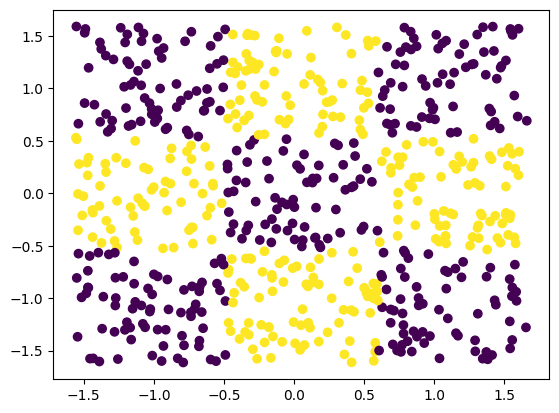

In [19]:
plt.scatter(test[["x"]], test[["y"]], c=y_test)

In [ ]:
layers = [
    {"output_dim": 10, "activation": "relu", "init": "he"},
    {"output_dim": 10, "activation": "relu", "init": "he"},
    {"output_dim": 10, "activation": "relu", "init": "he"},
    {"output_dim": 3, "activation": "softmax", "init": "uniform"}
] 

max_epochs = 5000

regularizations = [None, "l1", "l2"]
early_stops = [False, True]

for reg in regularizations:
    for early_stop in early_stops:

        mlp = networks.MLP(layers, input=train, regularization=reg, output_type="classification", regularization_alpha=0.001)
        losses, test_losses = mlp.train(train, y_train, val, y_val,
                        max_epochs=max_epochs, learning_rate=0.01, early_stopping=early_stop, plot_losses=False, verbose=False, min_stopping_delta=1e-8)

        plt.figure(figsize=(10, 6))
        plt.plot(losses, label="training set")
        plt.plot(test_losses, c="red", label="validation set")

        epochs = len(losses)

        plot_title = "Values of losses in each epoch "
        if early_stop:
            plot_title = plot_title + f"with early stop at epoch: {epochs} "
        else:
            plot_title = plot_title + "without early stopping, "
            if reg is None:
                plot_title = plot_title + "nor regularization"

        if reg is None and early_stop:
            plot_title = plot_title + "without regularization"
        elif reg is not None:
            plot_title = plot_title + f"with {reg} regularization"


        plt.title(plot_title)
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.legend()
        plt.show() 


        # calculate MSE

        y_pred = mlp.full_forward_pass(test.to_numpy().T)
        y_pred_train = mlp.full_forward_pass(train)
        y_pred_val = mlp.full_forward_pass(val)
        y_hat = mlp.predict(test.to_numpy().T)
        y_test_onehot = networks.assets.one_hot(y_test, 3)
        y_train_onehot = networks.assets.one_hot(y_train, 3)
        y_val_onehot = networks.assets.one_hot(y_val, 3)
        
        print("Fscore train: ", mlp.Fscore(y_pred_train, y_train_onehot))
        print("Fscore val: ", mlp.Fscore(y_pred_val, y_val_onehot))
        print("Fscore test: ", mlp.Fscore(y_pred, y_test_onehot))
        print("accuracy for test: ", np.sum(y_hat == y_test.flatten()) / len(y_hat))




 python reg_xor.py
Values of losses in each epoch without early stopping, nor regularization
Fscore train:  0.9980801534498425
Fscore val:  0.8808981571166868
Fscore test:  0.911581478019507
accuracy for test:  0.9078125
Values of losses in each epoch with early stop at epoch: 10 without regularization
Fscore train:  0.885114243659392
Fscore val:  0.5708402667465312
Fscore test:  0.5502023765890129
accuracy for test:  0.546875
Values of losses in each epoch without early stopping, with l1 regularization
Fscore train:  0.9806628777761129
Fscore val:  0.9013553084475181
Fscore test:  0.9289535822705771
accuracy for test:  0.95
Values of losses in each epoch with early stop at epoch: 10000 with l1 regularization
Fscore train:  0.9829502250660759
Fscore val:  0.8463741526534534
Fscore test:  0.8913954563630266
accuracy for test:  0.903125
Values of losses in each epoch without early stopping, with l2 regularization
Fscore train:  0.9801049639866536
Fscore val:  0.8757637431831086
Fscore test:  0.8999138493087575
accuracy for test:  0.9265625
Values of losses in each epoch with early stop at epoch: 10 with l2 regularization
Fscore train:  0.8800405146401762
Fscore val:  0.5657243668613101
Fscore test:  0.54716996457297
accuracy for test:  0.546875